In [16]:
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import cv2
%matplotlib inline

(1) Create the image of a paraboloid with one axis scaled (like an oval paraboloid).

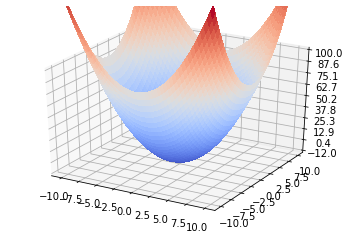

In [10]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# Make data.
X = np.arange(-10, 10, 0.1)
Y = np.arange(-10, 10, 0.1)
X, Y = np.meshgrid(X, Y)
Z = X**2 + Y**2 - 10
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,linewidth=0, antialiased=False)

ax.set_zlim(-12.01, 100.01)
ax.zaxis.set_major_locator(LinearLocator(10))

plt.show()

(2) Create the image of a rotated sin using rotation of coordinates.

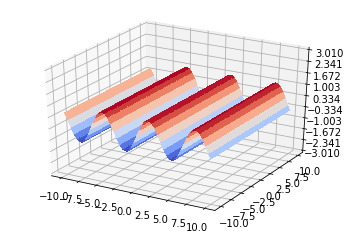

In [11]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
X = np.arange(-10, 10, 0.1)
Y = np.arange(-10, 10, 0.1)
X, Y = np.meshgrid(X, Y)
Z = np.sin(X)

surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,linewidth=0, antialiased=False)

ax.set_zlim(-3.01,3.01)
ax.zaxis.set_major_locator(LinearLocator(10))

plt.show()

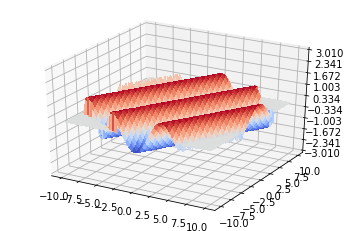

In [12]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

X = np.arange(-10, 10, 0.1)
Y = np.arange(-10, 10, 0.1)
X, Y = np.meshgrid(X, Y)
Z = np.sin(X)

from scipy import ndimage
Z =  ndimage.rotate(Z, 30, reshape=False)
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,linewidth=0, antialiased=False)

ax.set_zlim(-3.01,3.01)
ax.zaxis.set_major_locator(LinearLocator(10))

plt.show()

(3) Create the image of a gaussian.

In [ ]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# Make data.
X = np.arange(-10, 10, 0.1)
Y = np.arange(-10, 10, 0.1)
X, Y = np.meshgrid(X, Y)
Z = np.exp(-0.1*X**2-0.1*Y**2)

surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

ax.set_zlim(-0.1, 0.9)
ax.zaxis.set_major_locator(LinearLocator(10))

plt.show()

(4) Create a function that generates the image of a Gaussian optionally rotated by an angle \theta and with mx, my, sx, sy as input arguments

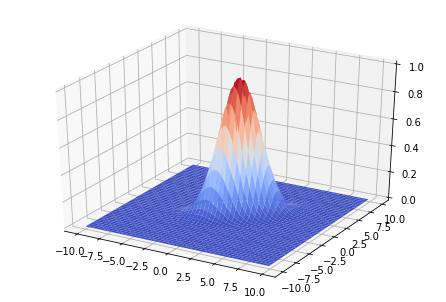

In [22]:
def rotateGaussian(mx, my, sx, sy, theta):

    xAxis = np.arange(-10, 10, 0.1)
    yAxis = np.arange(-10, 10, 0.1)
    xAxis, yAxis = np.meshgrid(xAxis, yAxis)
    
    theta = np.radians(theta)

    sx = sx**2; 
    sy = sy**2
    coef_1 = np.cos(theta)**2/(2*sx) + np.sin(theta)**2/(2*sy)
    coef_2 = np.sin(theta)**2/(2*sx) + np.cos(theta)**2/(2*sy)
    coef_3 = np.sin(2*theta)/(4*sx) - np.sin(2*theta)/(4*sy)

    zAxis = np.exp(-coef_1*(xAxis-mx)**2 - coef_2*(yAxis-my)**2 - 2*coef_3*(xAxis-mx)*(yAxis-my))
    
    fg_1 = plt.figure()
    fgr_1 = Axes3D(fg_1)
    fgr_1.plot_surface(xAxis,yAxis,zAxis, cmap=cm.coolwarm)
    plt.show()

#Setup
theta = 38 #dgr
mx = 0.8
my = 0.5
sx = 2
sy = 1

rotateGaussian(mx,my,sx,sy,theta)